In [1]:
import os
from google.cloud import bigquery
import pandas as pd 

In [2]:
#set environment
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= '/Users/jordanmaulino/Downloads/coastal-dynamo-309722-2032fe38e9cd.json'

In [3]:
client = bigquery.Client()

In [4]:
dataset_ref = client.dataset("github_repos", project="bigquery-public-data")

dataset=client.get_dataset(dataset_ref)

In [5]:
tables = list(client.list_tables(dataset))

In [6]:
for table in tables: 
    print(table.table_id)

commits
contents
files
languages
licenses
sample_commits
sample_contents
sample_files
sample_repos


Let's first take a look at the languages table

In [7]:
table_ref = dataset_ref.table("languages")

table=client.get_table(table_ref)

In [8]:
client.list_rows(table, max_results=5).to_dataframe()

,repo_name,language
0,Zycon42/philosophers,"[{'name': 'C', 'bytes': 13561}]"
1,penguin418/simple-ATM,"[{'name': 'C', 'bytes': 880}]"
2,thoferon/mule,"[{'name': 'C', 'bytes': 8676}]"
3,mikesouthron/CClojure,"[{'name': 'C', 'bytes': 102431}]"
4,hildjj/mgrep,"[{'name': 'C', 'bytes': 12652}]"


In [9]:
table.schema

[SchemaField('repo_name', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('language', 'RECORD', 'REPEATED', None, (SchemaField('name', 'STRING', 'NULLABLE', None, (), None), SchemaField('bytes', 'INTEGER', 'NULLABLE', None, (), None)), None)]

Now, let's find the most popular programming languages on Github.

In [12]:
#query to find the most popular languages
popular_languages_query = """
                    SELECT language.name as language_name, COUNT(*) AS num_repos
                    FROM `bigquery-public-data.github_repos.languages`,
                        UNNEST(language) AS language
                    GROUP BY language_name
                    ORDER BY num_repos DESC
                    """

query_job = client.query(popular_languages_query)

pop_lang = query_job.to_dataframe()

pop_lang.head()

,language_name,num_repos
0,JavaScript,1102722
1,CSS,816575
2,HTML,781471
3,Shell,639347
4,Python,549816


In [15]:
pop_lang

,language_name,num_repos
0,JavaScript,1102722
1,CSS,816575
2,HTML,781471
3,Shell,639347
4,Python,549816
...,...,...
412,Blade,1
413,Slim,1
414,ZAP,1
415,ImageJ Macro,1


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Since there's over 400 programming languages listed, let's take a look at just the top 10

Text(0.5, 1.0, 'Top 10 Most Popular Languages on Github (by # of Repositories)')

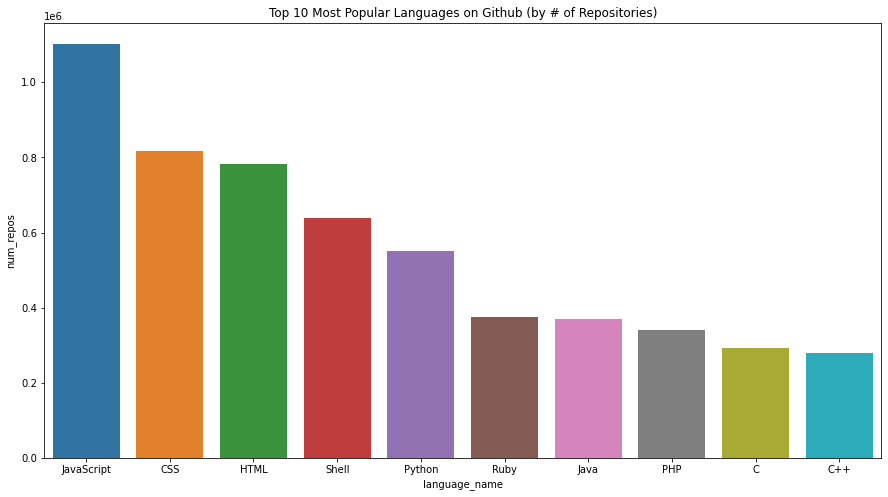

In [17]:
plt.figure(figsize=(15, 8))
sns.barplot(x="language_name", y="num_repos", data=pop_lang.loc[0:9])
plt.title("Top 10 Most Popular Languages on Github (by # of Repositories)")

Now let's write a query to see which repos contain the most languages

In [35]:
most_lang_query = """
                  SELECT repo_name, COUNT(l.name) AS num_languages
                  FROM `bigquery-public-data.github_repos.languages`,
                    UNNEST(language) as l
                  GROUP BY repo_name
                  ORDER BY num_languages DESC
                  """

query_job = client.query(most_lang_query)

most_lang = query_job.to_dataframe()

most_lang.head()

,repo_name,num_languages
0,polyrabbit/polyglot,216
1,nzavagli/UnrealPy,159
2,mollstam/UnrealPy,159
3,aswinpj/Pygments,154
4,objcio/pygments,153


Text(0.5, 1.0, 'Top 10 Repositories with the Most Programming Languages')

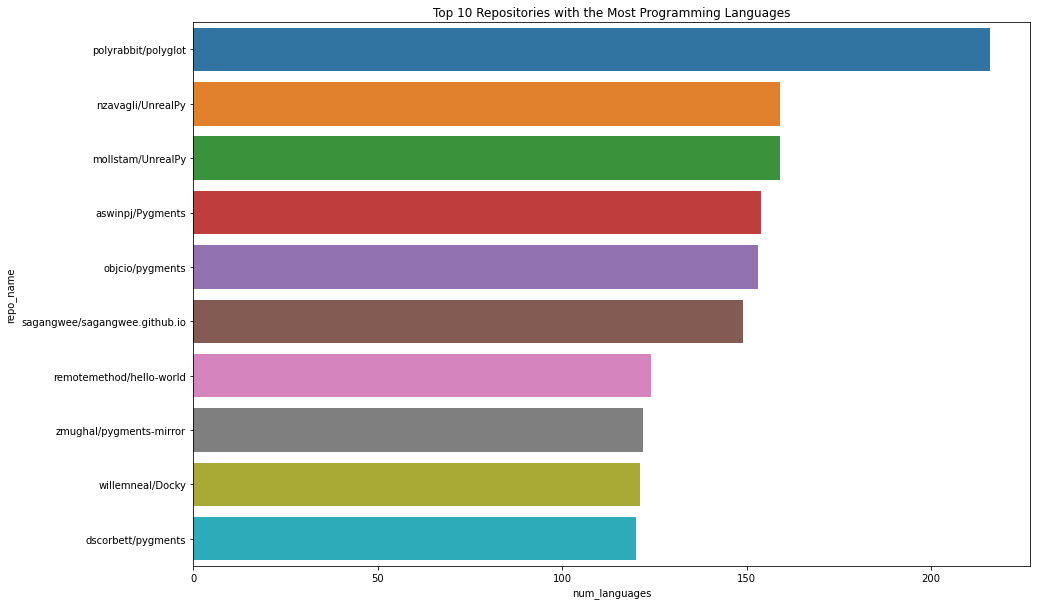

In [39]:
plt.figure(figsize=(15, 10))
sns.barplot(x="num_languages", y="repo_name", data=most_lang.loc[0:9])
plt.title("Top 10 Repositories with the Most Programming Languages")

Now let's take a look at the commits data

In [18]:
table_ref = dataset_ref.table("commits")

table=client.get_table(table_ref)

In [19]:
client.list_rows(table, max_results=5).to_dataframe()

,commit,tree,parent,author,committer,subject,message,trailer,difference,difference_truncated,repo_name,encoding
0,14f2f380c3f50cc7c0d25b3083daa934590f5b27,510b105a8bcac5c5eedd9ce94b6a03b170801e3b,[7df7df41694507186e2367bd75b487ebaa457fe2],"{'name': 'Nicolas Albert', 'email': '1b2dd0bac...","{'name': 'Nicolas Albert', 'email': '1b2dd0bac...",Close #4870 - NPE in Error log view opening an...,Close #4870 - NPE in Error log view opening an...,"[{'key': 'Former-commit-id', 'value': 'd344a43...",[],None,[convertigo/convertigo-webapp],None
1,80972a28cc53e90e9fd84bb3b4ffeaf2eb2524f2,4b825dc642cb6eb9a060e54bf8d69288fbee4904,[dab9061816dcc00fae1a9f92bd5d98aff45b9ab2],"{'name': 'Тукаев Александр Юрьевич', 'email': ...","{'name': 'Тукаев Александр Юрьевич', 'email': ...",[ERM-4780] fix Core,[ERM-4780] fix Core\n\ngit-tfs-id: [http://uk-...,"[{'key': 'git-tfs-id', 'value': '[http://uk-tf...",[],None,[2gis/nuclear-aggregates-layer],None
2,dc72457db95bc00d0be490f0eb408b85aeb5fd47,4b825dc642cb6eb9a060e54bf8d69288fbee4904,[],"{'name': 'Chris Day', 'email': '312fbdf6852bf0...","{'name': 'Chris Day', 'email': '312fbdf6852bf0...",Created team project folder $/EventStore via t...,Created team project folder $/EventStore via t...,"[{'key': 'git-tfs-id', 'value': '[https://chri...",[],None,[chrispday/DomainCQRS],None
3,a8517976b98d0f1565a7808ceecce32892b25a91,c9b44dd60a39507d7b159498eb7fce3e01e6349b,[2a5c120a3e3e3aa303b6fedd8f8b2914c0e799ed],"{'name': 'Francis Brosnan Blázquez', 'email': ...","{'name': 'Francis Brosnan Blázquez', 'email': ...",af-gen: * [new] Making af-gen to also place un...,af-gen:\n* [new] Making af-gen to also place u...,"[{'key': 'libafdal', 'value': '', 'email': None}]",[],None,[ASPLes/libaxl],None
4,5b19c10ae0d637bc0d22fc331160aac34d4e804b,5e4d945094afa274e3d4219bb981d8c61390a2fa,[0d52f927610c571d3896992cf8203d1cf2ee27a1],"{'name': 'Alexander Loew', 'email': '6c4a44468...","{'name': 'Alexander Loew', 'email': '6c4a44468...","DO NOT USE, clean up","DO NOT USE, clean up\n\n\ngit-svn-id: https://...","[{'key': 'Former-commit-id', 'value': 'f678d80...",[],None,[pygeo/pycmbs],None


In [20]:
table.schema

[SchemaField('commit', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('tree', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('parent', 'STRING', 'REPEATED', None, (), None),
 SchemaField('author', 'RECORD', 'NULLABLE', None, (SchemaField('name', 'STRING', 'NULLABLE', None, (), None), SchemaField('email', 'STRING', 'NULLABLE', None, (), None), SchemaField('time_sec', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('tz_offset', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('date', 'RECORD', 'NULLABLE', None, (SchemaField('seconds', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('nanos', 'INTEGER', 'NULLABLE', None, (), None)), None)), None),
 SchemaField('committer', 'RECORD', 'NULLABLE', None, (SchemaField('name', 'STRING', 'NULLABLE', None, (), None), SchemaField('email', 'STRING', 'NULLABLE', None, (), None), SchemaField('time_sec', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('tz_offset', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('date', 'REC

Let's do another simple query to see who has the most commits. To save on run time, we'll use the sample_commits table, which is a small sample of GitHub commits. 

In [24]:
most_commits_query = """
                     SELECT committer.name AS committer_name, COUNT(*) AS num_commits
                     FROM `bigquery-public-data.github_repos.sample_commits`
                     GROUP BY committer_name
                     ORDER BY num_commits DESC
                     """


query_job = client.query(most_commits_query)

most_commits = query_job.to_dataframe()

most_commits.head()

,committer_name,num_commits
0,Linus Torvalds,65331
1,Greg Kroah-Hartman,57661
2,David S. Miller,54669
3,Mauro Carvalho Chehab,23407
4,Ingo Molnar,19120
